In [79]:
import numpy as np
import pandas as pd

In [80]:
soil = pd.read_csv('soil.csv')

In [81]:
soil

,District,Zn %,Fe%,Cu %,Mn %,B %,S %
0,Anantapur,67.67,65.14,91.88,77.70,73.54,85.90
1,Chittoor,80.51,78.19,99.77,91.82,89.04,88.62
2,East Godavari,79.27,88.14,95.54,97.24,88.05,95.67
3,Guntur,58.30,71.16,98.86,91.40,86.15,86.81
4,Krishna,78.62,82.02,98.05,95.23,65.78,98.56
...,...,...,...,...,...,...,...
668,Birbhum,93.95,100.00,98.63,97.06,78.52,22.07
669,KALIMPONG,100.00,100.00,100.00,84.81,100.00,62.50
670,Maldah,98.56,93.78,97.61,68.60,81.34,44.98
671,Murshidabad,96.36,99.59,100.00,94.31,87.85,36.84


In [82]:
soil = soil.dropna()

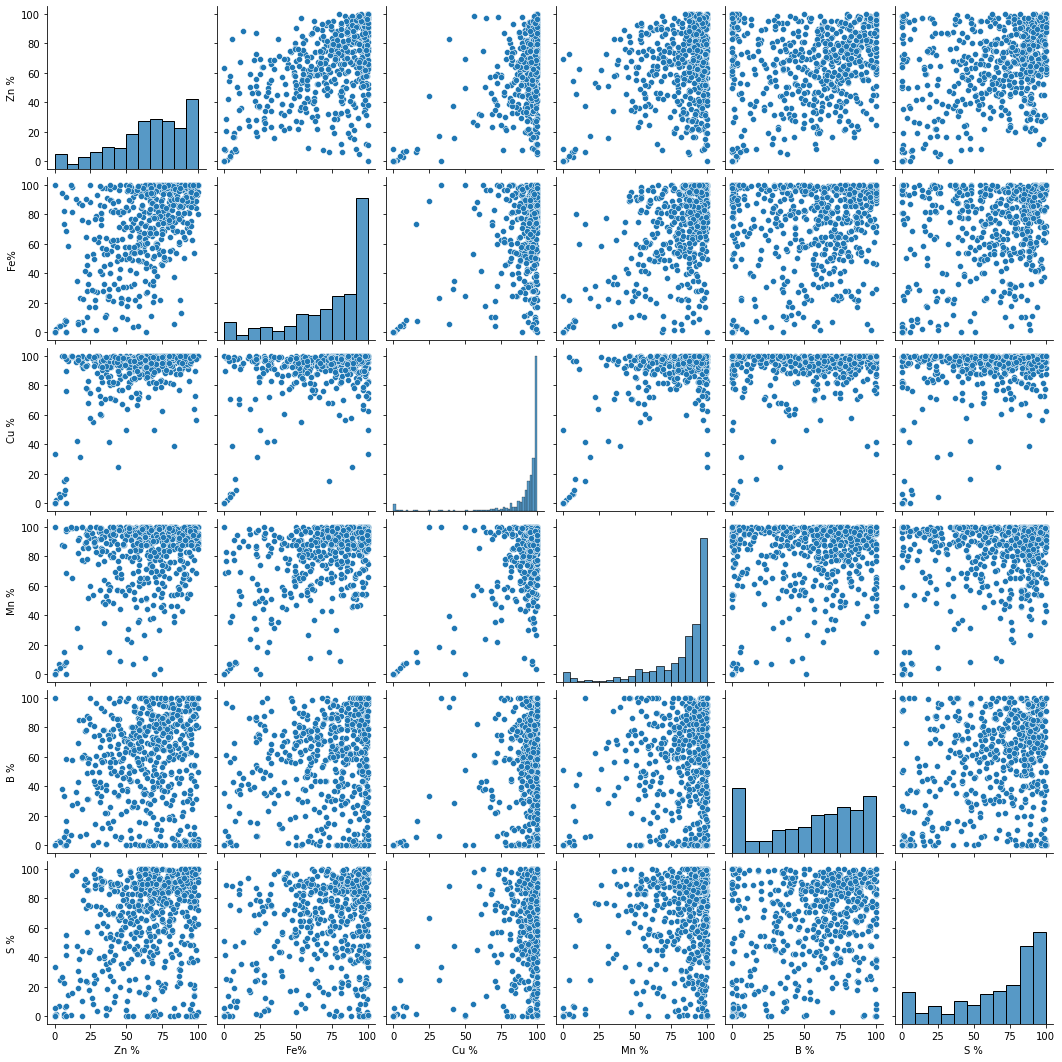

In [83]:
import seaborn as sns

sns.pairplot(soil)

In [84]:
soil_data = soil.sample(155)
soil_data

,District,Zn %,Fe%,Cu %,Mn %,B %,S %
639,Pratapgarh,92.23,88.90,99.64,92.51,82.02,90.54
234,Lohardaga,80.02,85.74,89.05,76.27,80.09,48.69
593,Barabanki,55.48,54.13,85.11,79.67,29.38,45.94
178,NUH,79.35,73.38,93.67,75.53,93.94,88.05
574,North Tripura,72.95,99.46,98.63,98.53,70.43,92.71
...,...,...,...,...,...,...,...
169,Fatehabad,66.22,32.78,94.65,37.76,68.55,89.88
452,Gurdaspur,92.26,89.82,99.40,51.80,100.00,82.77
615,Hardoi,97.91,97.24,89.40,99.24,95.94,61.24
346,Chandrapur,27.24,28.10,96.28,92.24,80.66,28.07


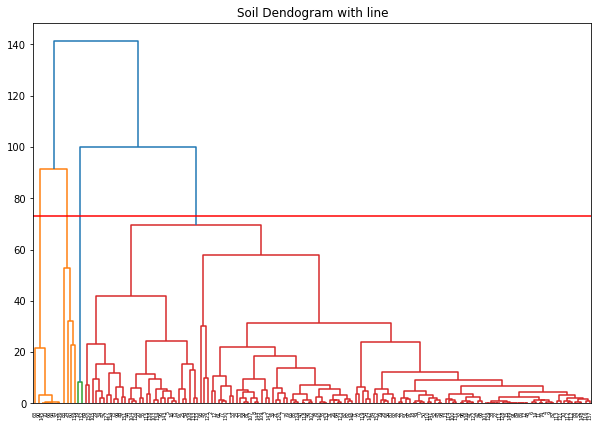

In [85]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.title("Soil Dendrogram")

selected_data = soil_data.iloc[:, 3:5]

plt.title("Soil Dendogram with line")
clusters = shc.linkage(selected_data, 
            method='complete', 
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 73, color = 'r', linestyle = '-')

In [86]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
clustering_model.fit(selected_data)
clustering_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int64)

Text(0.5, 1.0, 'Labeled Soil Data')

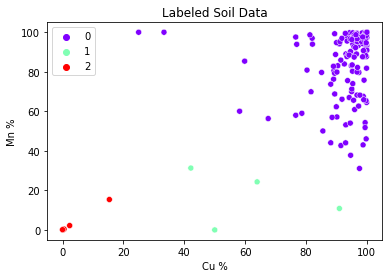

In [91]:
data_labels = clustering_model.labels_
sns.scatterplot(x='Cu %', 
                y='Mn %', 
                data=selected_data, 
                hue=data_labels,
                palette="rainbow").set_title('Labeled Soil Data')

In [92]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
clustering_model.fit(selected_data)
clustering_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

Text(0.5, 1.0, 'Labeled Soil Data')

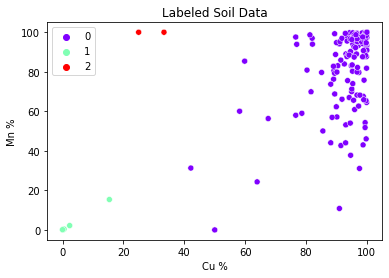

In [93]:
data_labels = clustering_model.labels_
sns.scatterplot(x='Cu %', 
                y='Mn %', 
                data=selected_data, 
                hue=data_labels,
                palette="rainbow").set_title('Labeled Soil Data')

In [94]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
clustering_model.fit(selected_data)
clustering_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

Text(0.5, 1.0, 'Labeled Soil Data')

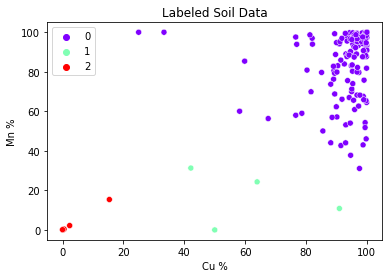

In [95]:
data_labels = clustering_model.labels_
sns.scatterplot(x='Cu %', 
                y='Mn %', 
                data=selected_data, 
                hue=data_labels,
                palette="rainbow").set_title('Labeled Soil Data')

In [96]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clustering_model.fit(selected_data)
clustering_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0,
       2], dtype=int64)

Text(0.5, 1.0, 'Labeled Soil Data')

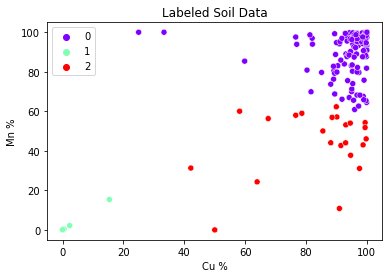

In [97]:
data_labels = clustering_model.labels_
sns.scatterplot(x='Cu %', 
                y='Mn %', 
                data=selected_data, 
                hue=data_labels,
                palette="rainbow").set_title('Labeled Soil Data')